In [151]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [152]:
# read the csv file from the location where it is downloaded 

airbnb = pd.read_csv('airbnb_open_data.csv')
airbnb.columns=[col.lower().replace(" ","_") for col in airbnb.columns]


C:\Users\mingy\AppData\Local\Temp\ipykernel_14800\636256235.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('airbnb_open_data.csv')


In [153]:
# remobe dollar sign and return the result as float
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))

airbnb["price"]=airbnb["price"].apply(lambda x: remove_dollar_sign(x))
airbnb["service_fee"]=airbnb["service_fee"].apply(lambda x: remove_dollar_sign(x))
# airbnb.neighbourhood_group.unique()


In [154]:
#drop the value since the most of these values ​​are distinct for each line, it doesn't make any sense
airbnb.drop(columns=["id","host_id"],axis=1,inplace=True)

In [155]:
#drop these two attribute since they are same
airbnb.drop(columns=["country_code","country"],axis=1,inplace=True)

In [156]:
# drop it since there too many nan value
airbnb.drop(columns=["house_rules","license"], axis=1, inplace=True)

In [157]:
attribute = ['neighbourhood','neighbourhood_group','lat','long','room_type','construction_year','price','service_fee','minimum_nights','availability_365','number_of_reviews','instant_bookable']

In [158]:
airbnb = airbnb[attribute]

In [159]:
airbnb.isnull().sum()

neighbourhood           16
neighbourhood_group     29
lat                      8
long                     8
room_type                0
construction_year      214
price                  247
service_fee            273
minimum_nights         409
availability_365       448
number_of_reviews      183
instant_bookable       105
dtype: int64

In [160]:
airbnb

,neighbourhood,neighbourhood_group,lat,long,room_type,construction_year,price,service_fee,minimum_nights,availability_365,number_of_reviews,instant_bookable
0,Kensington,Brooklyn,40.64749,-73.97237,Private room,2020.0,966.0,193.0,10.0,286.0,9.0,False
1,Midtown,Manhattan,40.75362,-73.98377,Entire home/apt,2007.0,142.0,28.0,30.0,228.0,45.0,False
2,Harlem,Manhattan,40.80902,-73.94190,Private room,2005.0,620.0,124.0,3.0,352.0,0.0,True
3,Clinton Hill,Brooklyn,40.68514,-73.95976,Entire home/apt,2005.0,368.0,74.0,30.0,322.0,270.0,True
4,East Harlem,Manhattan,40.79851,-73.94399,Entire home/apt,2009.0,204.0,41.0,10.0,289.0,9.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Williamsburg,Brooklyn,40.70862,-73.94651,Private room,2003.0,844.0,169.0,1.0,227.0,0.0,False
102595,Morningside Heights,Manhattan,40.80460,-73.96545,Private room,2016.0,837.0,167.0,1.0,395.0,1.0,True
102596,Park Slope,Brooklyn,40.67505,-73.98045,Private room,2009.0,988.0,198.0,3.0,342.0,0.0,True
102597,Long Island City,Queens,40.74989,-73.93777,Entire home/apt,2015.0,546.0,109.0,2.0,386.0,5.0,True


In [161]:
value_attribute = ['lat','long','construction_year','price','service_fee','minimum_nights','availability_365','number_of_reviews']
for i in value_attribute:
    mean_value = airbnb[i].mean()
    airbnb[i].fillna(mean_value,inplace=True)
airbnb = airbnb.dropna()


C:\Users\mingy\AppData\Local\Temp\ipykernel_14800\1235091451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb[i].fillna(mean_value,inplace=True)


In [162]:
airbnb.isnull().sum()

neighbourhood          0
neighbourhood_group    0
lat                    0
long                   0
room_type              0
construction_year      0
price                  0
service_fee            0
minimum_nights         0
availability_365       0
number_of_reviews      0
instant_bookable       0
dtype: int64

In [163]:
options = ['Brooklyn', 'Manhattan','Queens','Staten Island','Bronx']
  
# selecting rows based on condition
airbnb = airbnb[airbnb['neighbourhood_group'].isin(options)]

In [164]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [165]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,50.000000,50.0,50.0,50.00,50.0
25%,342.000000,338.0,340.5,345.25,357.0
50%,625.293536,623.0,626.0,627.50,631.0
75%,913.000000,910.0,921.0,907.00,906.0
max,1200.000000,1200.0,1200.0,1200.00,1200.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

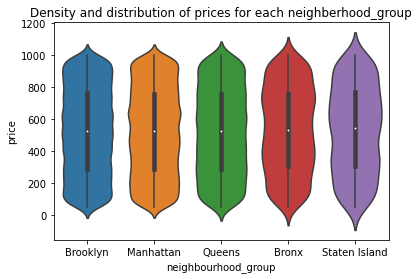

In [166]:
sub_6=airbnb[airbnb.price < 1000]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

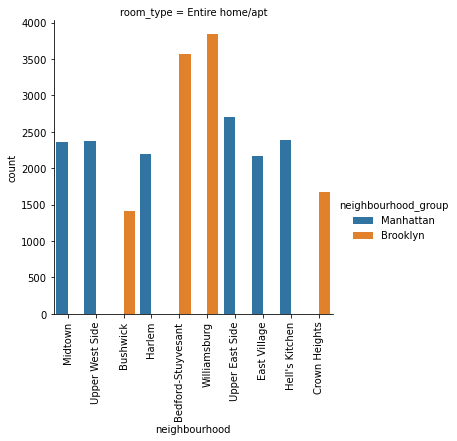

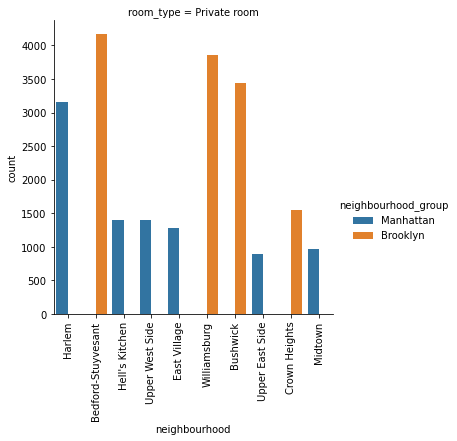

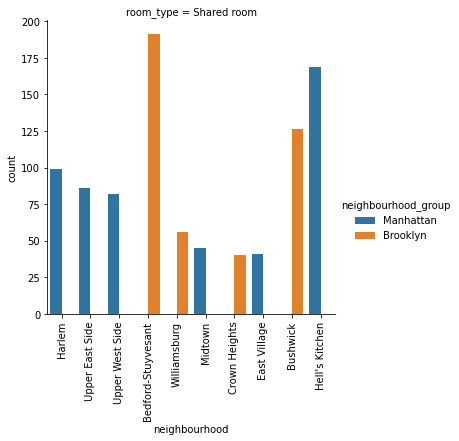

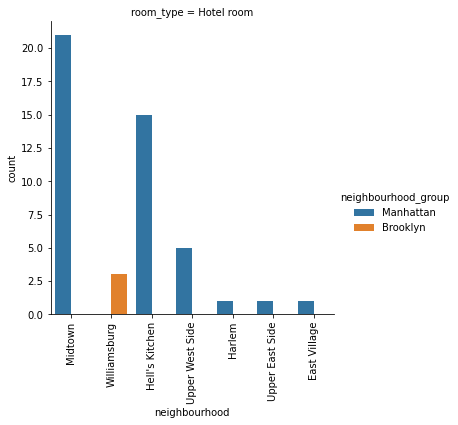

In [167]:


#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
entire_room = sub_7[sub_7.room_type == 'Entire home/apt']
Private_room = sub_7[sub_7.room_type == 'Private room']
Shared_room = sub_7[sub_7.room_type == 'Shared room']
Hotel_room = sub_7[sub_7.room_type == 'Hotel room']
room_type = [entire_room ,Private_room,Shared_room,Hotel_room ]
for i in room_type:
    viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=i, kind='count')
    viz_3.set_xticklabels(rotation=90)



In [ ]:
correlation_attributes.isnull().sum()

host_identity_verified               281
neighbourhood_group                    0
neighbourhood                         16
lat                                    8
long                                   8
country                              531
country_code                         129
instant_bookable                     103
cancellation_policy                   75
room_type                              0
construction_year                    209
price                                246
service_fee                          272
minimum_nights                       408
number_of_reviews                    183
reviews_per_month                  15877
review_rate_number                   324
calculated_host_listings_count       319
availability_365                     437
house_rules                        52122
license                           102566
dtype: int64

<AxesSubplot:>

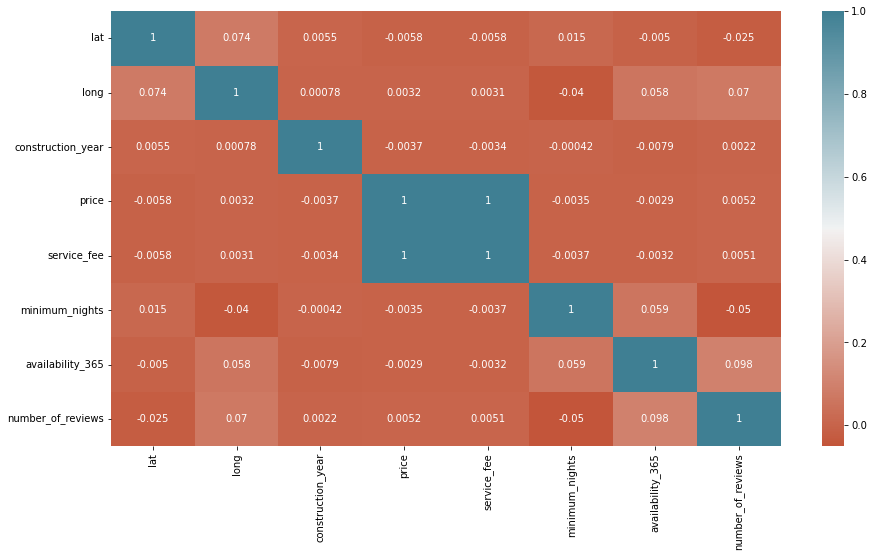

In [182]:
palette = sns.diverging_palette(20, 220, n=256)
corr = airbnb.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr,cmap=palette, annot=True)